In [1]:
!pip install pandas numpy matplotlib seaborn missingno

   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   - -------------------------------------- 1.8/43.6 MB 8.4 MB/s eta 0:00:05
   -- ------------------------------------- 3.1/43.6 MB 7.4 MB/s eta 0:00:06
   ---- ----------------------------------- 4.5/43.6 MB 6.9 MB/s eta 0:00:06
   ----- ---------------------------------- 5.5/43.6 MB 6.9 MB/s eta 0:00:06
   ------ --------------------------------- 6.8/43.6 MB 6.7 MB/s eta 0:00:06
   ------- -------------------------------- 8.4/43.6 MB 6.7 MB/s eta 0:00:06
   -------- ------------------------------- 9.7/43.6 MB 6.6 MB/s eta 0:00:06
   ---------- ----------------------------- 11.0/43.6 MB 6.6 MB/s eta 0:00:05
   ----------- ---------------------------- 12.3/43.6 MB 6.5 MB/s eta 0:00:05
   ------------ --------------------------- 13.6/43.6 MB 6.5 MB/s eta 0:00:05
   ------------- -------------------------- 14.9/43.6 MB 6.5 MB/s eta 0:00:05
   -------------- ------------------------- 16.3/43.6 MB 6.5 MB/s eta 0:00:05
 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Set style
plt.style.use('ggplot')  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
# Load dataset
df = pd.read_csv("titanic.csv")

# Display first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Check dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Check missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Check if 'Cabin' column exists before dropping
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)
else:
    print("Cabin column not found.")

# Fill missing Age with the median value
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with the most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Remove duplicates
df.drop_duplicates(inplace=True)


Cabin column not found.


In [18]:
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())


Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


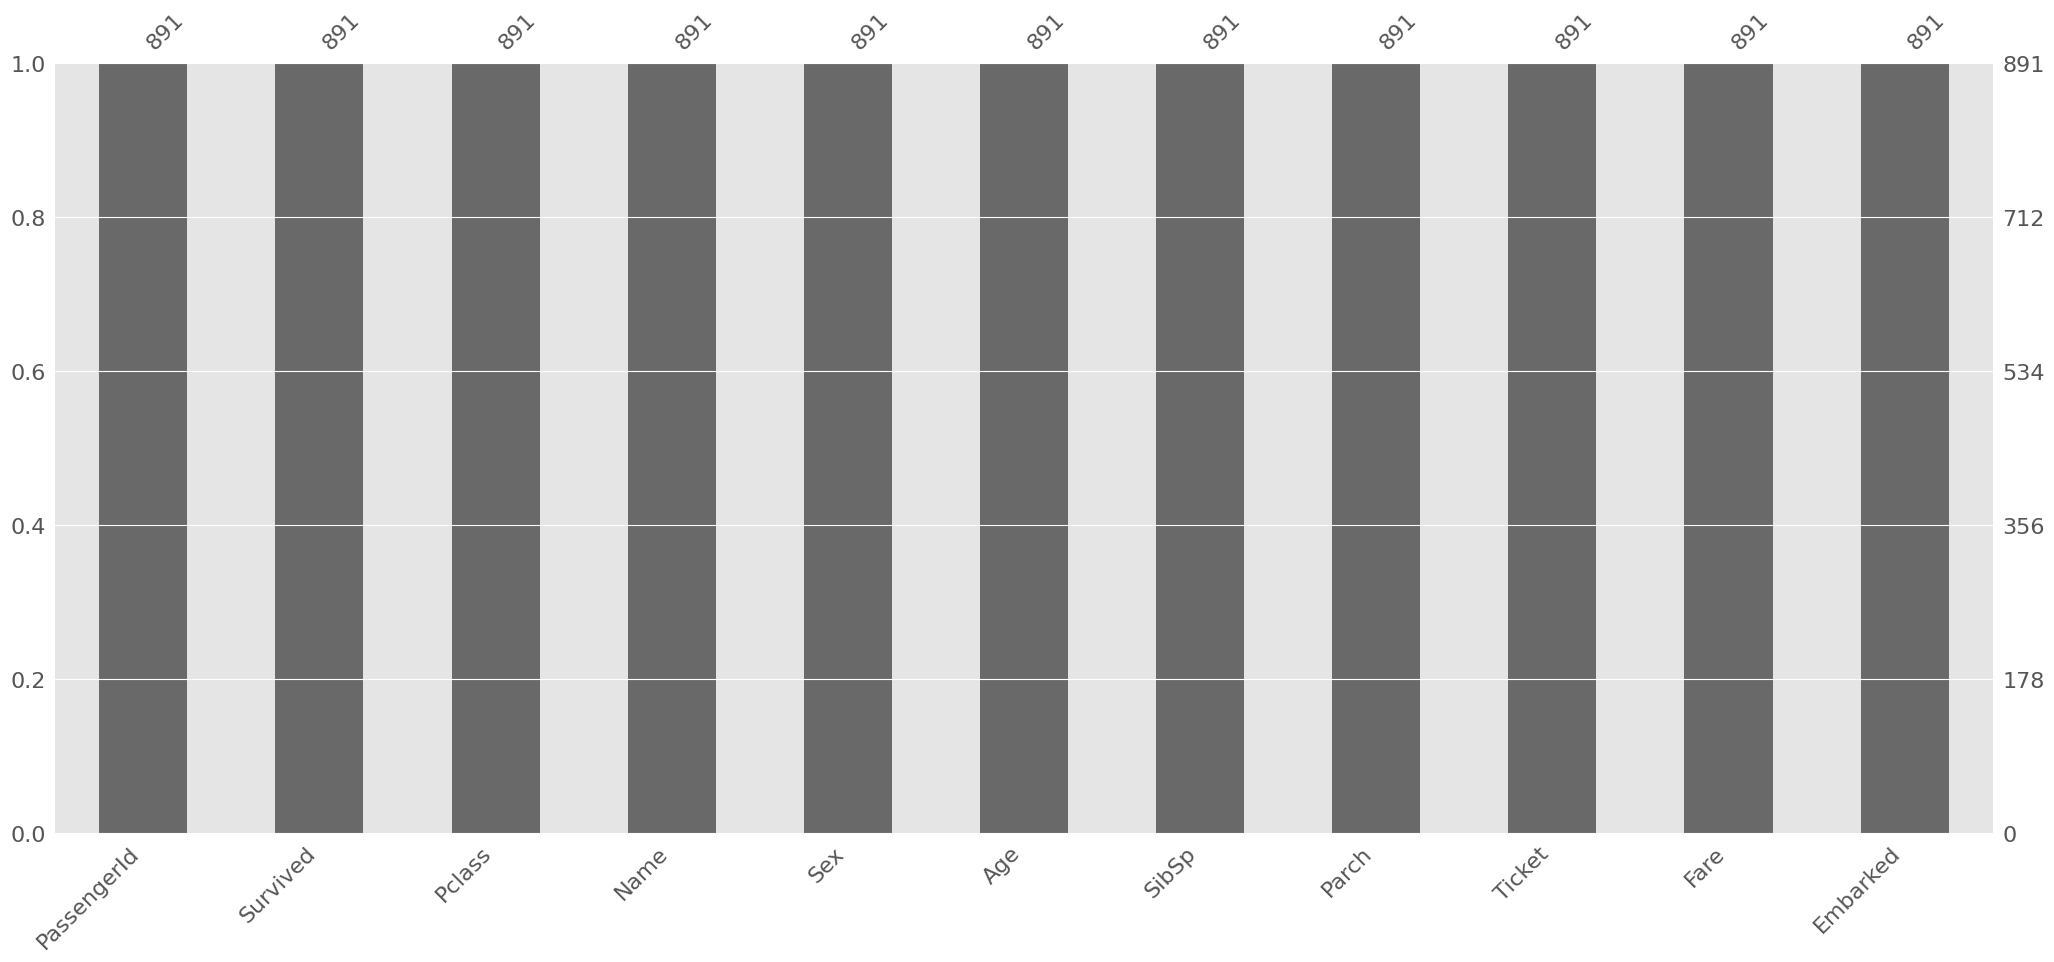

In [19]:
msno.bar(df)
plt.show()


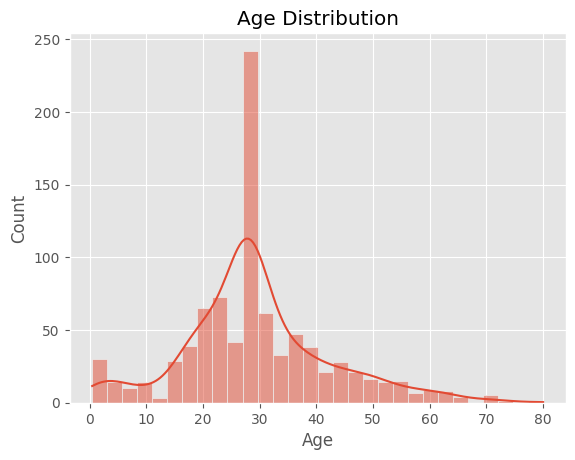

In [20]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


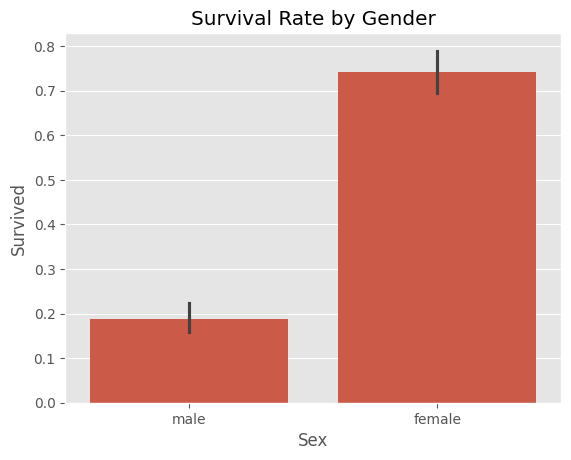

In [21]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


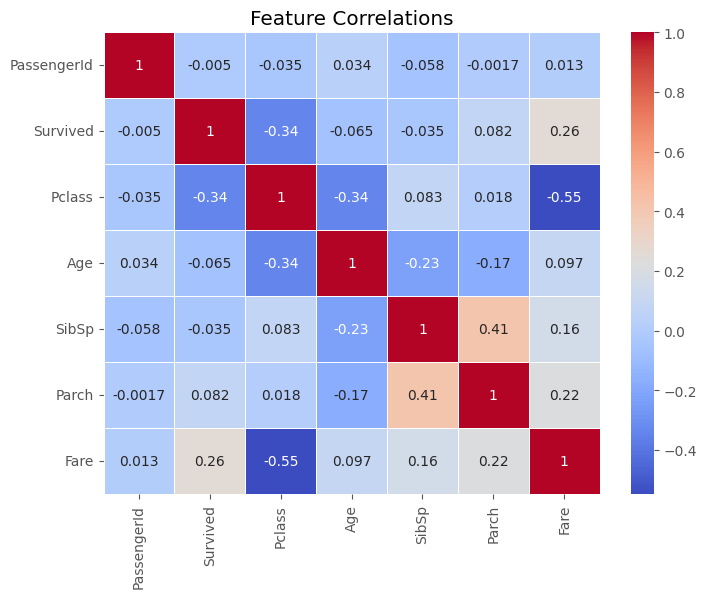

In [23]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()
